In [ ]:
## MXXL SIMULATED UNIVERSE (Durham MXXL Mock Light-Cone - Based on 2017 Smith)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

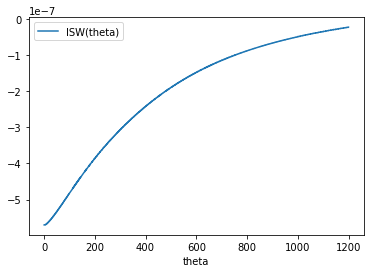

In [10]:
## for theoritical_prediction only

## 10_arc_min - bias 1.6

file_path_1 = 'isw_theory_1.6.csv'
df = pd.read_csv(file_path_1)

df.plot(x='theta', y='ISW(theta)')
plt.show()



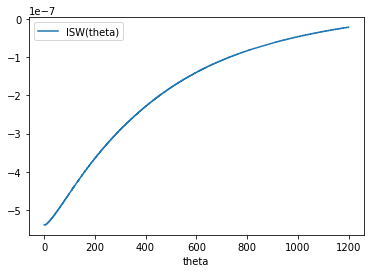

In [11]:
## 10_arc_min - bias 1.0

file_path_2 = 'isw_theory_1.csv'
df1 = pd.read_csv(file_path_2)

df1.plot(x='theta', y='ISW(theta)')

plt.show()

In [12]:
## 20_arc_min - bias 1.0

file_path_3 = 'isw_theory_20_1.csv'
df2 = pd.read_csv(file_path_3)
df2.plot(x='theta', y='ISW(theta)')
plt.show()

In [4]:
## for calculated_only

In [13]:
## 10_arc_mins

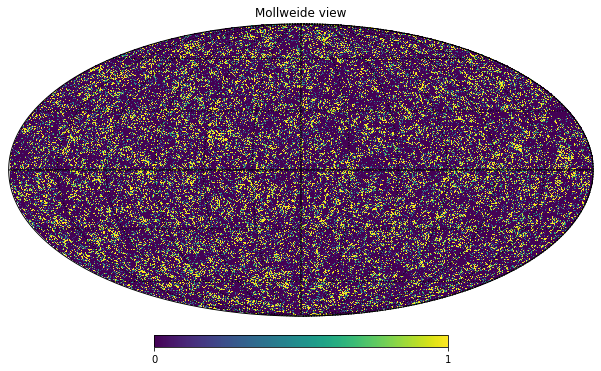

In [24]:
##trough_map (10 arc_mins) (first 20_percentile)

import healpy as hp
a1 = hp.read_map("trough_sim.fits")
hp.mollview(a1)
hp.graticule()

In [25]:
## isw_map

import healpy as hp
a2 = hp.read_map("isw_sim.fits")
hp.mollview(a2)
hp.graticule()

In [3]:
import treecorr
import numpy as np
import matplotlib.pyplot as plt

##defining catalog
cat1 = treecorr.Catalog("trough_sim.fits", ra_col='RA', dec_col='DEC', ra_units='deg', dec_units='deg',k_col = 'count')
cat2 = treecorr.Catalog("isw_sim.fits", ra_col='RA', dec_col='DEC',ra_units='deg', dec_units='deg',k_col ='count')

##kappa-kappa correlation

kk = treecorr.KKCorrelation(min_sep=10, max_sep=1200, nbins =20, sep_units='arcmin')
kk.process(cat1,cat2)


##calculating correlation function
xi = kk.xi
varxi= kk.varxi
r = np.exp(kk.meanlogr)


In [19]:
##from jacknife fits (path - jacknife_error.ipynb ...copied from this notebook)

##20_arc_min
xi_error1 = np.array([ 0.03970867,  0.03312729, -0.04594982,  0.02959829,  0.003887  ,
        0.00206612,  0.00137968,  0.00265153,  0.00965137, -0.00075083,
        0.01329728,  0.00728358,  0.01820421,  0.00496297,  0.01348527,
        0.01442448,  0.00106491, -0.00855239, -0.02934357, -0.04311032])


##10_arc_min
xi_error = np.array([ 0.03963892,  0.03286801, -0.04534855,  0.02847658,  0.00395413,
        0.0015328 ,  0.00015538,  0.00217962,  0.00875494, -0.0017367 ,
        0.01149763,  0.00531968,  0.01598804,  0.00304404,  0.01128521,
        0.0122754 , -0.00097345, -0.00614285, -0.02106101, -0.0317043 ])

Text(0.5, 1.0, 'ISW vs trough')

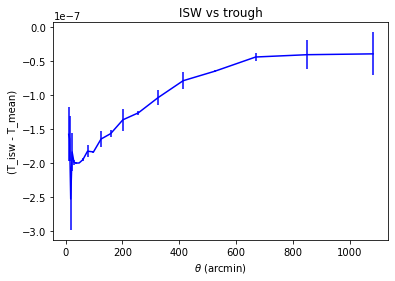

In [21]:
plt.errorbar(r, xi*10**(-6) ,yerr = xi_error*10**(-6),  color='blue')
plt.xlabel(r'$\theta$ (arcmin)')
plt.ylabel("(T_isw - T_mean)")
plt.title("ISW vs trough")

In [14]:
## 20_arc_mins

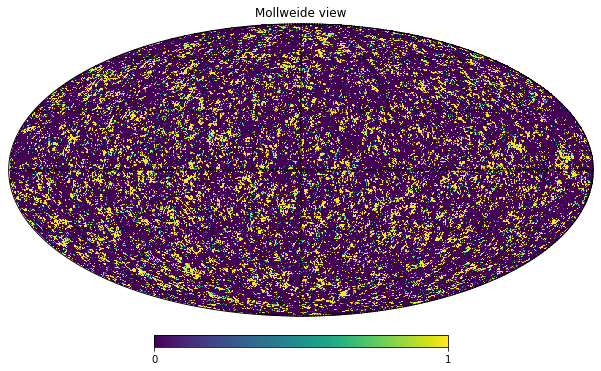

In [26]:
##trough_map (20 arc_mins) (first 20_percentile)

import healpy as hp
b1 = hp.read_map("/home/u/Udit.Tyagi/help/trecorr_20/trough_20_sim.fits")
hp.mollview(b1)
hp.graticule()

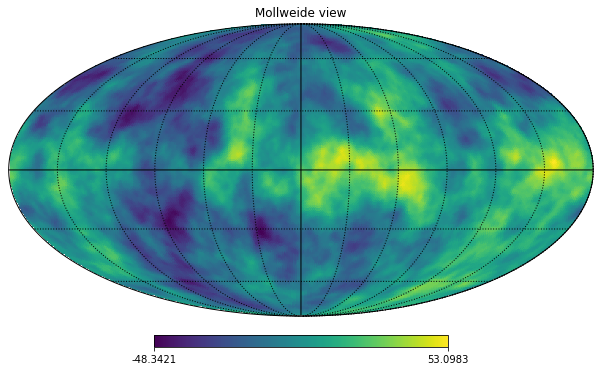

In [27]:
##isw_map

import healpy as hp
b2 = hp.read_map("/home/u/Udit.Tyagi/help/trecorr1/isw_sim.fits")
hp.mollview(b2)
hp.graticule()

In [6]:
##calculaing cross- correlation

import treecorr
import numpy as np
import matplotlib.pyplot as plt

##defining catalog
cat1 = treecorr.Catalog("trough_20_sim.fits", ra_col='RA', dec_col='DEC', ra_units='deg', dec_units='deg',k_col = 'count')
cat2 = treecorr.Catalog("isw_sim.fits", ra_col='RA', dec_col='DEC',ra_units='deg', dec_units='deg',k_col ='count')

##kappa-kappa correlation

kk = treecorr.KKCorrelation(min_sep=10, max_sep=1200, nbins =20, sep_units='arcmin')
kk.process(cat1,cat2)


##calculating correlation function
xi1 = kk.xi
varxi1 = kk.varxi
r1 = np.exp(kk.meanlogr)

In [23]:
plt.errorbar(r1, xi1*10**(-6) ,yerr = xi_error1*10**(-6),  color='blue')
plt.xlabel(r'$\theta$ (arcmin)')
plt.ylabel("(T_isw - T_mean)")
plt.title("ISW vs trough")

Text(0.5, 1.0, 'ISW vs trough')

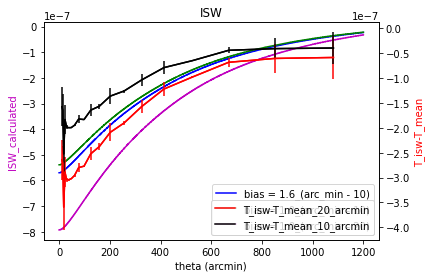

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

ax1.plot(df['theta'],df['ISW(theta)'], color='b')
ax1.set_xlabel('theta (arcmin)')  
ax1.set_ylabel('ISW_calculated', color='b') 

ax1.plot(df1['theta'],df1['ISW(theta)'], color='g')
ax1.set_xlabel('theta (arcmin)')  
ax1.set_ylabel('ISW_calculated', color='g')

ax1.plot(df2['theta'],df2['ISW(theta)'], color='m')
ax1.set_xlabel('theta (arcmin)')  
ax1.set_ylabel('ISW_calculated', color='m')



ax1.legend(['bias = 1.6_(arc_min - 10)', 'bias = 1.0_(arc_min - 10)', "bias = 1.0_(arc_min - 20)"])



ax2 = ax1.twinx()


ax2.plot(r1, xi1*10**(-6), color='red')
ax2.errorbar(r1,xi1*10**(-6),yerr = xi_error1*10**(-6),color  = 'red')
ax2.set_ylabel('T_isw-T_mean', color='r') 

ax2.plot(r, xi*10**(-6), color='black')
ax2.errorbar(r,xi*10**(-6),yerr = xi_error*10**(-6),color  = 'black') 

ax2.legend(['T_isw-T_mean_20_arcmin','T_isw-T_mean_10_arcmin'],loc = 'lower right')
 
ax2.legend(['T_isw-T_mean_20_arcmin','T_isw-T_mean_10_arcmin'],loc = 'lower right')



  



plt.title('ISW')


plt.show()